In [13]:
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def plot_time_series(data, activity):
    """
    Plots the 3 channels of the time series data.

    Parameters:
    data (pandas.DataFrame): The time series data.
    activity (str): The activity name to be used in the title.
    """
    # Extract time and accelerometer data from the activity of standing + stairs
    time = data.iloc[:, 0]  # First column: Time
    x = data.iloc[:, 1]     # Second column: X-axis acceleration
    y = data.iloc[:, 2]     # Third column: Y-axis acceleration
    z = data.iloc[:, 3]     # Fourth column: Z-axis acceleration

    # Create subplots
    fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

    # Plot X-axis acceleration
    axes[0].plot(time, x, color='r', label="X-axis")
    axes[0].set_ylabel("Acceleration (X)")
    axes[0].legend()
    axes[0].grid()

    # Plot Y-axis acceleration
    axes[1].plot(time, y, color='g', label="Y-axis")
    axes[1].set_ylabel("Acceleration (Y)")
    axes[1].legend()
    axes[1].grid()

    # Plot Z-axis acceleration
    axes[2].plot(time, z, color='b', label="Z-axis")
    axes[2].set_xlabel("Time")
    axes[2].set_ylabel("Acceleration (Z)")
    axes[2].legend()
    axes[2].grid()

    # Title for the whole figure
    plt.suptitle(f"Accelerometer Time Series ({activity})")

    # Show plot
    plt.show()

In [15]:
def plot_cwt_spectrograms(data, wavelet ,activity):
    """
    Plots the Continuous Wavelet Transform (CWT) spectrograms for the given time series data.

    Parameters:
    data (pandas.DataFrame): The time series data.
    activity (str): The activity name to be used in the title.
    """
    # Extract time and accelerometer data
    time = data.iloc[:, 0]  # First column: Time
    x = data.iloc[:, 1]     # Second column: X-axis acceleration
    y = data.iloc[:, 2]     # Third column: Y-axis acceleration
    z = data.iloc[:, 3]     # Fourth column: Z-axis acceleration

    # Define scales
    fs = 52  # Sampling frequency
    f_min, f_max = 1, 64  # Frequency range of interest
    C_f = 0.25  # Mexican Hat wavelet-specific constant

    scale_min = fs / (f_max * C_f)  # Smallest scale (high freq)
    scale_max = fs / (f_min * C_f)  # Largest scale (low freq)

    scales = np.linspace(scale_min, scale_max, num=100)  # 100 scales


    # Perform CWT for each signal
    coeff_x, _ = pywt.cwt(x, scales, wavelet)
    coeff_y, _ = pywt.cwt(y, scales, wavelet)
    coeff_z, _ = pywt.cwt(z, scales, wavelet)

    # Plot CWT spectrograms (scalograms)
    fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

    # X-axis scalogram
    axes[0].imshow(np.abs(coeff_x), aspect='auto', extent=[time.min(), time.max(), scales.max(), scales.min()], cmap='jet')
    axes[0].set_title("CWT Scalogram - X Axis")
    axes[0].set_ylabel("Scale (inverse frequency)")
    axes[0].grid()

    # Y-axis scalogram
    axes[1].imshow(np.abs(coeff_y), aspect='auto', extent=[time.min(), time.max(), scales.max(), scales.min()], cmap='jet')
    axes[1].set_title("CWT Scalogram - Y Axis")
    axes[1].set_ylabel("Scale (inverse frequency)")
    axes[1].grid()

    # Z-axis scalogram
    axes[2].imshow(np.abs(coeff_z), aspect='auto', extent=[time.min(), time.max(), scales.max(), scales.min()], cmap='jet')
    axes[2].set_title("CWT Scalogram - Z Axis")
    axes[2].set_ylabel("Scale (inverse frequency)")
    axes[2].set_xlabel("Time")
    axes[2].grid()

    # Title for the whole figure
    plt.suptitle(f"CWT Spectrograms ({activity})")

    # Show the figure
    plt.tight_layout()
    plt.show()


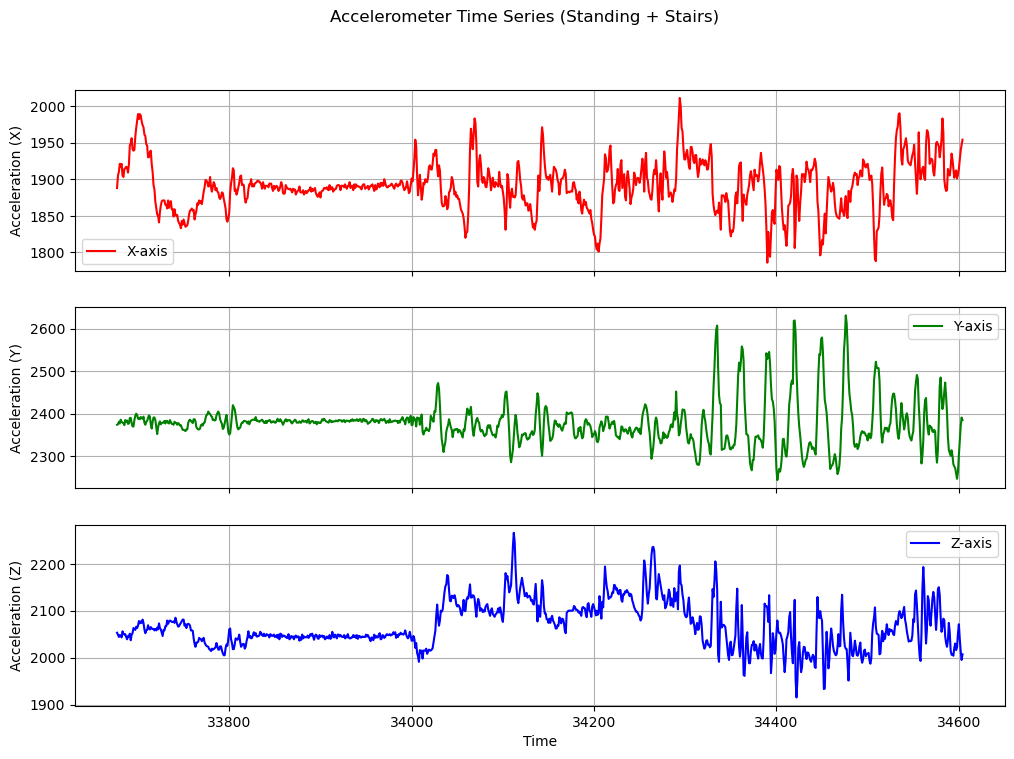

In [16]:
# Load the data from the CSV file
data = pd.read_csv('./dataset/1.csv', header=None)

# separate the data into 7 different bins, one for each different activity
working_pc = data[data.iloc[:, 4] == 1]
standing_stairs = data[data.iloc[:, 4] == 2]
standing = data[data.iloc[:, 4] == 3]
walking = data[data.iloc[:, 4] == 4]
stairs = data[data.iloc[:, 4] == 5]
walking_talking = data[data.iloc[:, 4] == 6]
standing_talking = data[data.iloc[:, 4] == 7]

# Plot the time series data for the activity of standing + stairs
plot_time_series(standing_stairs, "Standing + Stairs")

In [17]:
sombrero = pywt.ContinuousWavelet('mexh')
print(sombrero)

ContinuousWavelet mexh
  Family name:    Mexican hat wavelet
  Short name:     mexh
  Symmetry:       symmetric
  DWT:            False
  CWT:            True
  Complex CWT:    False


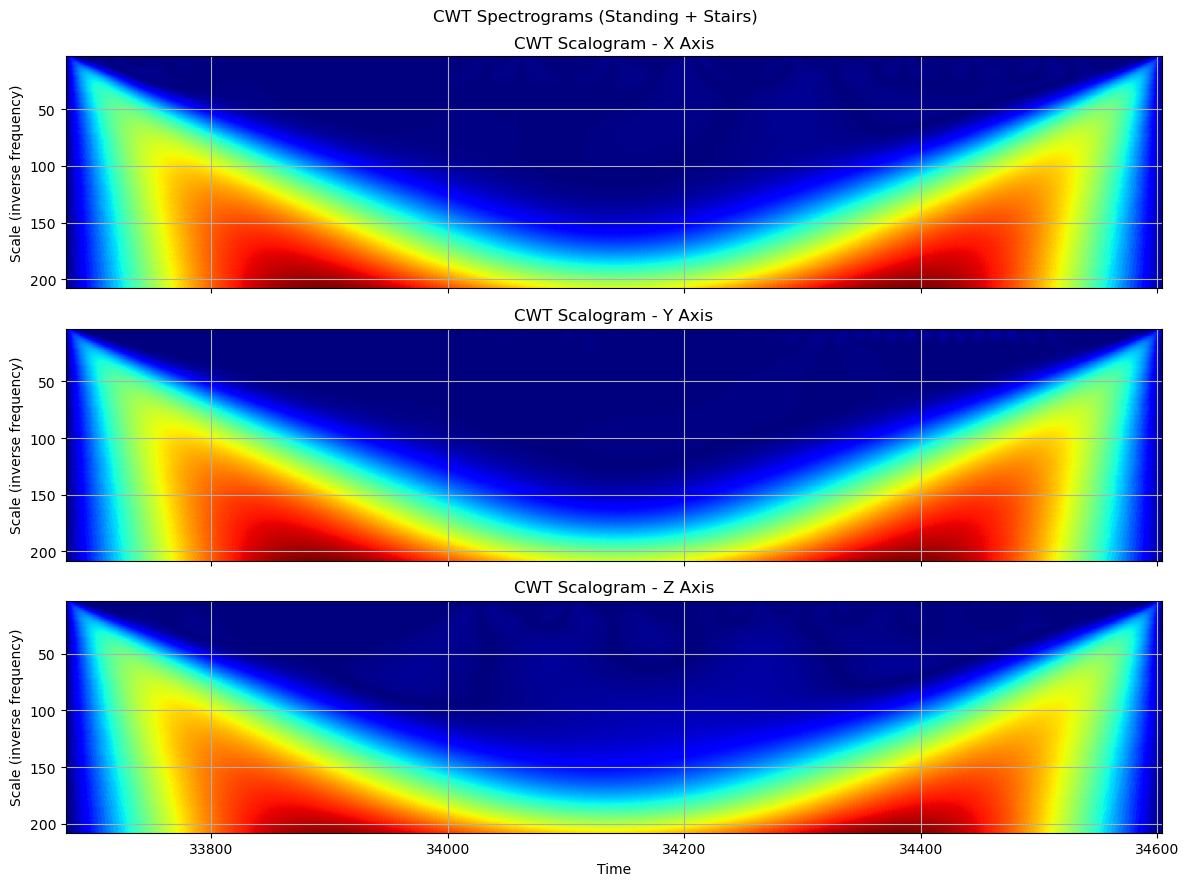

In [18]:
# Plot the CWT spectrograms for the activity of standing + stairs
plot_cwt_spectrograms(standing_stairs, sombrero, "Standing + Stairs")


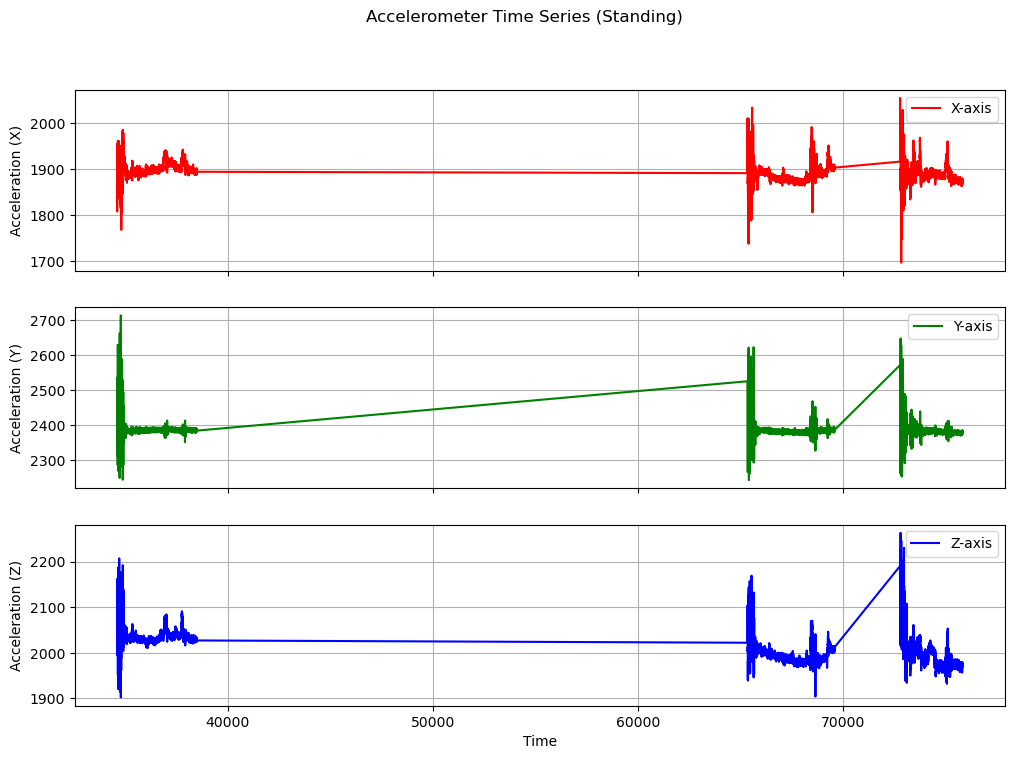

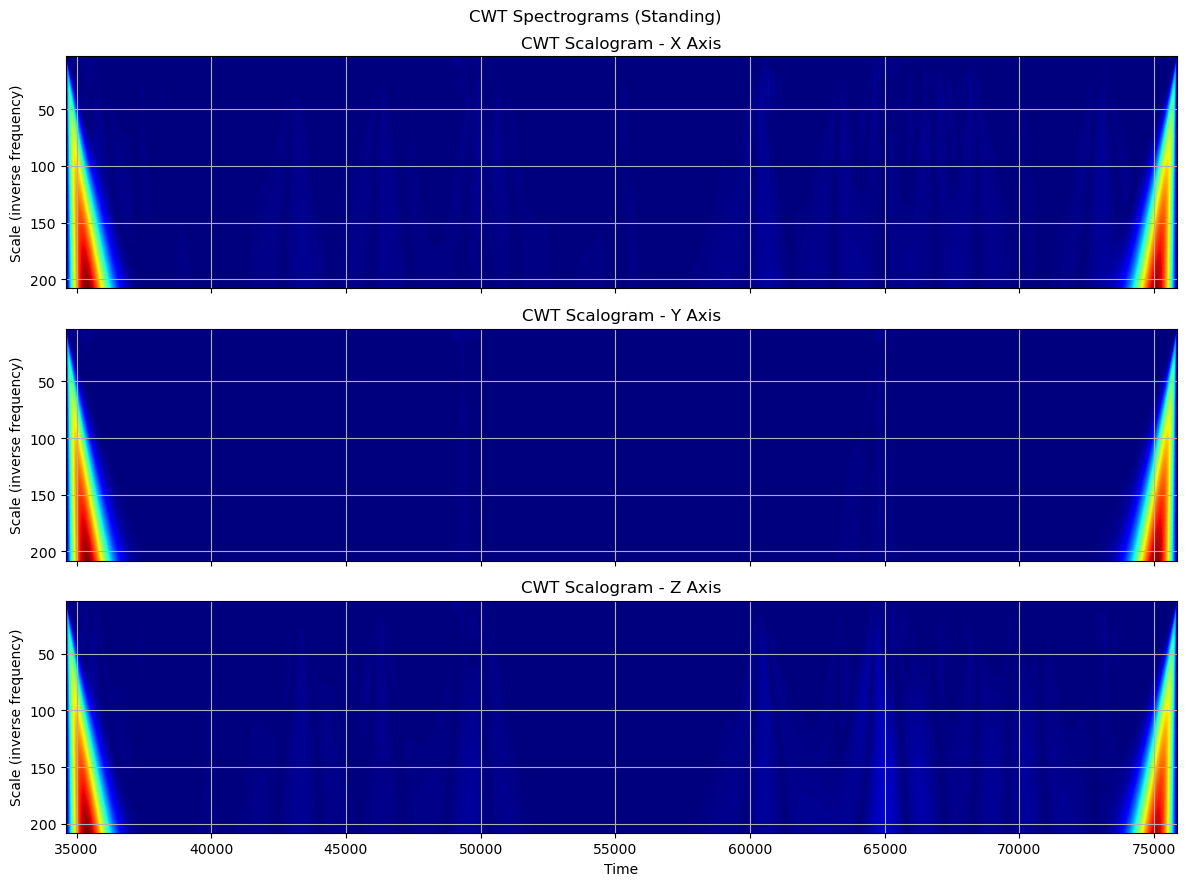

In [19]:
# Plot the time series data for the activity of standing
plot_time_series(standing, "Standing")
# plot the CWT spectrograms for the activity of standing
plot_cwt_spectrograms(standing, sombrero, "Standing")

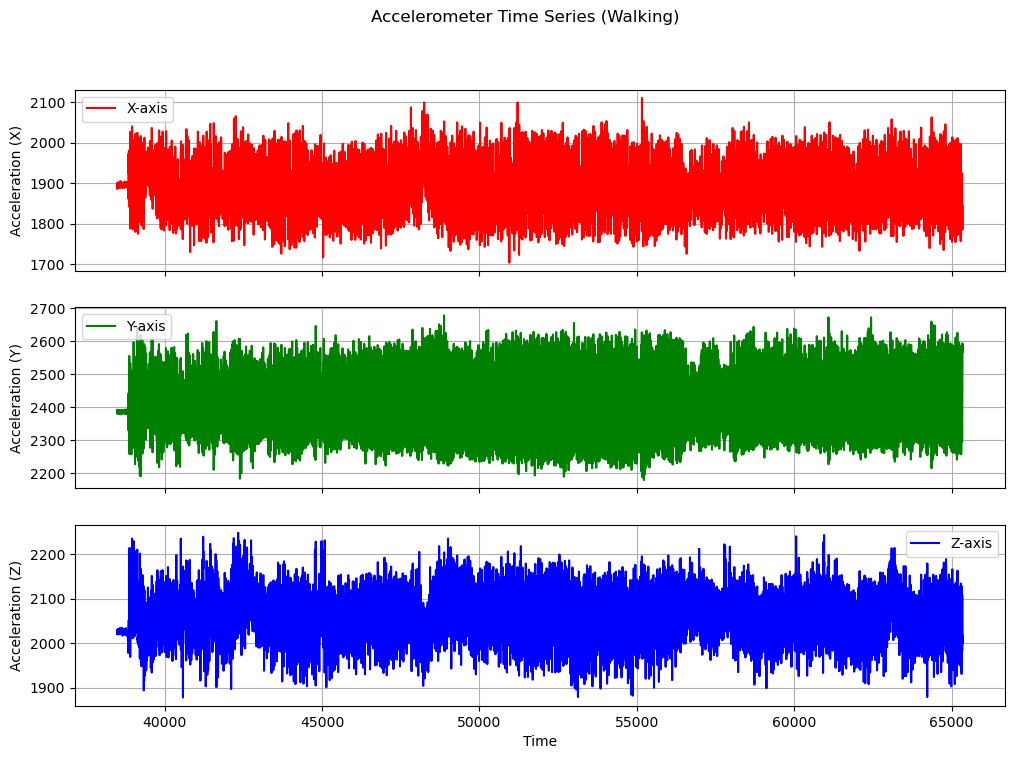

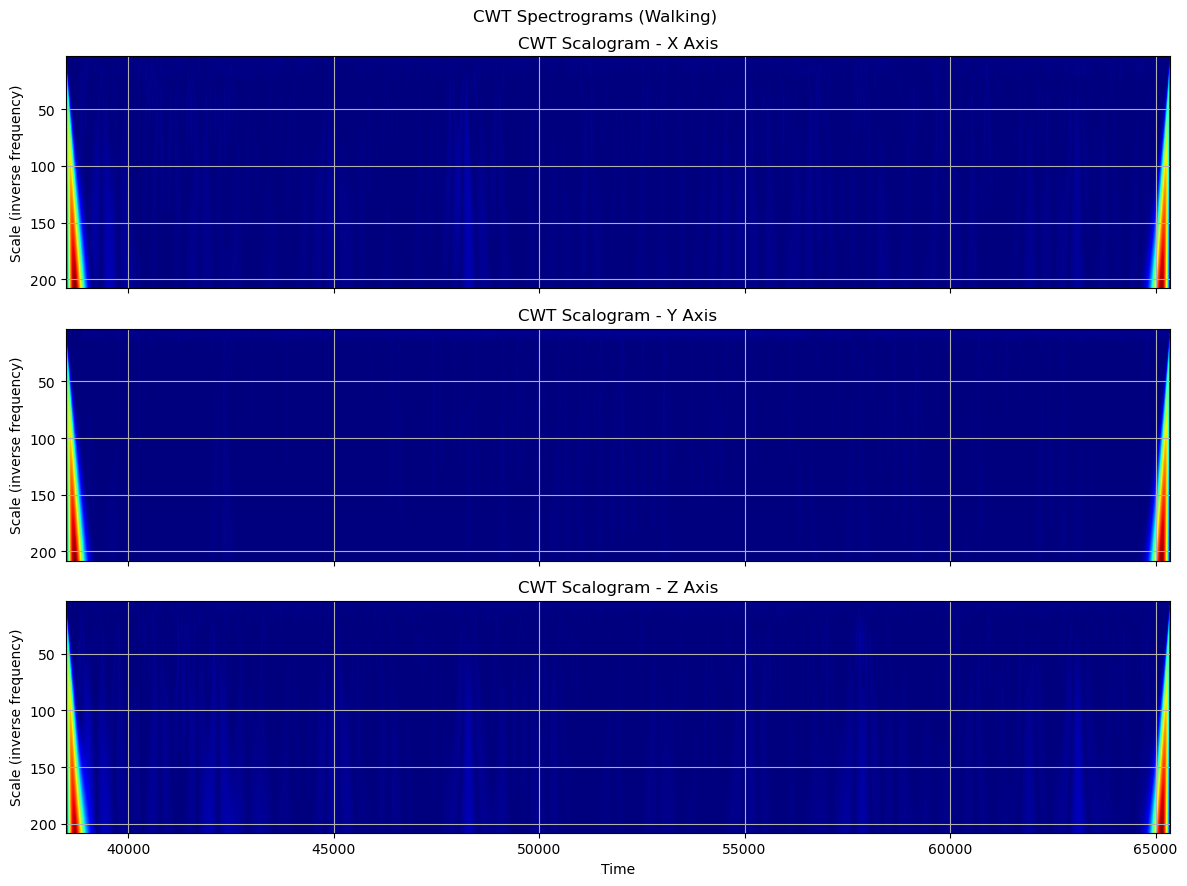

In [20]:
# plot the time series data for the activity of walking
plot_time_series(walking, "Walking")
# plot the CWT spectrograms for the activity of walking
plot_cwt_spectrograms(walking, sombrero, "Walking")
